# 1. Find missing values

In [1]:
import pandas as pd

df = pd.read_csv("../Data/student-mat-missing-data.csv")

df.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18.0,U,GT3,A,4,4,at_home,...,4.0,3.0,4.0,1,1,3.0,6.0,5,6,6
1,1,GP,F,17.0,U,GT3,T,1,1,at_home,...,5.0,3.0,3.0,1,1,3.0,4.0,5,5,6
2,2,GP,F,15.0,U,LE3,T,1,1,at_home,...,4.0,3.0,2.0,2,3,3.0,10.0,7,8,10
3,3,GP,F,15.0,U,GT3,T,4,2,health,...,3.0,2.0,2.0,1,1,5.0,2.0,15,14,15
4,4,GP,F,16.0,U,GT3,T,3,3,other,...,4.0,3.0,2.0,1,2,5.0,4.0,6,10,10


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    object 
 2   sex         395 non-null    object 
 3   age         381 non-null    float64
 4   address     390 non-null    object 
 5   famsize     395 non-null    object 
 6   Pstatus     395 non-null    object 
 7   Medu        395 non-null    int64  
 8   Fedu        395 non-null    int64  
 9   Mjob        395 non-null    object 
 10  Fjob        395 non-null    object 
 11  reason      395 non-null    object 
 12  guardian    395 non-null    object 
 13  traveltime  395 non-null    int64  
 14  studytime   395 non-null    int64  
 15  failures    395 non-null    int64  
 16  schoolsup   395 non-null    object 
 17  famsup      395 non-null    object 
 18  paid        395 non-null    object 
 19  activities  395 non-null    o

In [3]:
df.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,381.000000,395.000000,395.000000,395.000000,395.000000,395.000000,390.000000,379.000000,390.000000,395.000000,395.000000,390.000000,390.000000,395.000000,395.000000,395.000000
mean,197.000000,16.700787,2.749367,2.521519,1.448101,2.035443,0.334177,3.943590,3.237467,3.120513,1.481013,2.291139,3.548718,5.569231,10.908861,10.713924,10.415190
std,114.170924,1.275157,1.094735,1.088201,0.697505,0.839240,0.743651,0.896665,0.990201,1.112370,0.890741,1.287897,1.394604,7.232395,3.319195,3.761505,4.581443
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,98.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,197.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,295.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,56.000000,19.000000,19.000000,20.000000


In [4]:
df.value_counts(dropna=False) # counts of unique rows, 395 since Unnamed: 0 is index

Unnamed: 0  school  sex  age   address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
0           GP      F    18.0  U        GT3      A        4     4     at_home   teacher   course      mother    2           2          0         yes        no      no    no          yes      yes     no        no        4.0     3.0       4.0    1     1     3.0     6.0       5   6   6     1
271         GP      F    18.0  U        GT3      T        2     3     other     services  reputation  father    1           4          0         no         yes     yes   yes         yes      yes     yes       yes       4.0     5.0       5.0    1     3     2.0     4.0       15  14  14    1
269         GP      F    18.0  R        GT3      T        2     1     other     other     reputation  mother    2           2          

In [5]:
df.iloc[:,1:].value_counts(dropna=False) # every row is unique even without index

school  sex  age   address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
GP      F    15.0  R        GT3      T        1     1     at_home   other     home        mother    2           4          1         yes        yes     yes   yes         yes      yes     yes       no        3.0     1.0       2.0    1     1     1.0     2.0       7   10  10    1
        M    16.0  U        LE3      T        4     3     services  other     reputation  mother    1           2          0         no         yes     yes   yes         yes      yes     yes       no        5.0     4.0       2.0    1     2     5.0     10.0      15  15  15    1
                                                    2     teacher   other     course      mother    1           2          0         no         no      no    yes         y

In [6]:
df.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.isna().sum(axis=0) # get nan count per column
df.columns[df.isna().sum(axis=0) > 0] # gets series of the column names with any nan
df.isna().any() # series with True False for each column
df.loc[df.isna().any(axis=1)] # gets all rows with nan in any column
df.loc[:, df.isna().any(axis=0)] # used with loc indexing to get a filtered df

,age,address,famrel,freetime,goout,health,absences
0,18.0,U,4.0,3.0,4.0,3.0,6.0
1,17.0,U,5.0,3.0,3.0,3.0,4.0
2,15.0,U,4.0,3.0,2.0,3.0,10.0
3,15.0,U,3.0,2.0,2.0,5.0,2.0
4,16.0,U,4.0,3.0,2.0,5.0,4.0
...,...,...,...,...,...,...,...
390,20.0,U,5.0,5.0,4.0,4.0,11.0
391,17.0,U,2.0,4.0,5.0,2.0,3.0
392,21.0,R,5.0,5.0,3.0,3.0,3.0
393,18.0,R,4.0,4.0,1.0,5.0,0.0


In [8]:
import os, sys

sys.path.append(os.path.abspath("modules/"))

print(sys.path)

['/Users/johsan/GitHub/data-processing-johan-sandberg/Exercises', '/usr/local/Cellar/python@3.9/3.9.13_4/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/usr/local/Cellar/python@3.9/3.9.13_4/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/usr/local/Cellar/python@3.9/3.9.13_4/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/johsan/VirtualEnvironments/data-processing-johan-sandberg-8ymr_x9o/lib/python3.9/site-packages', '/Users/johsan/GitHub/data-processing-johan-sandberg/Exercises/modules']


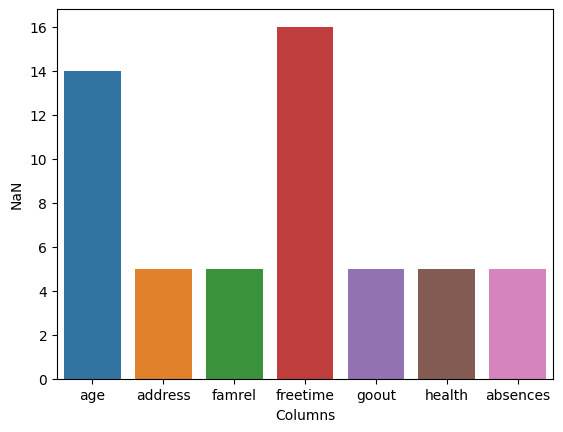

In [9]:
import data_utils

data_utils.columns_with_nans(df)

In [10]:
df.loc[df["freetime"].isna()]

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14
160,160,GP,M,NaN,NaN,LE3,T,2,1,at_home,...,NaN,NaN,NaN,2,2,NaN,NaN,7,6,0
191,191,GP,F,NaN,NaN,GT3,T,1,1,at_home,...,NaN,NaN,NaN,1,1,NaN,NaN,8,8,9
257,257,GP,M,19.0,U,LE3,A,4,3,services,...,4.0,NaN,1.0,1,1,1.0,12.0,11,11,11
276,276,GP,F,NaN,NaN,GT3,A,3,2,other,...,NaN,NaN,NaN,1,1,NaN,NaN,10,9,9
293,293,GP,F,NaN,NaN,LE3,T,3,1,services,...,NaN,NaN,NaN,1,1,NaN,NaN,18,18,18


In [11]:
df.loc[df["age"].isna()]

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
20,20,GP,M,NaN,U,GT3,T,4,3,teacher,...,4.0,4.0,1.0,1,1,1.0,0.0,13,14,15
71,71,GP,M,NaN,U,GT3,T,4,2,other,...,3.0,3.0,3.0,1,1,3.0,0.0,10,10,10
102,102,GP,M,NaN,U,GT3,T,4,4,services,...,5.0,3.0,3.0,1,1,5.0,4.0,10,13,14
106,106,GP,F,NaN,U,GT3,T,2,2,other,...,5.0,1.0,2.0,1,1,3.0,8.0,7,8,8
121,121,GP,M,NaN,U,GT3,T,2,2,services,...,5.0,5.0,4.0,1,2,5.0,6.0,16,14,15
160,160,GP,M,NaN,NaN,LE3,T,2,1,at_home,...,NaN,NaN,NaN,2,2,NaN,NaN,7,6,0
188,188,GP,F,NaN,U,GT3,A,3,3,health,...,3.0,3.0,3.0,1,3,3.0,6.0,8,7,9
191,191,GP,F,NaN,NaN,GT3,T,1,1,at_home,...,NaN,NaN,NaN,1,1,NaN,NaN,8,8,9
214,214,GP,F,NaN,R,LE3,T,4,4,services,...,5.0,2.0,1.0,1,2,3.0,12.0,8,10,10
270,270,GP,F,NaN,U,GT3,T,3,3,other,...,4.0,3.0,5.0,3,3,5.0,15.0,9,9,9


In [12]:
df.loc[df[["freetime", "age"]].isna().any(axis=1)]


,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
20,20,GP,M,NaN,U,GT3,T,4,3,teacher,...,4.0,4.0,1.0,1,1,1.0,0.0,13,14,15
71,71,GP,M,NaN,U,GT3,T,4,2,other,...,3.0,3.0,3.0,1,1,3.0,0.0,10,10,10
87,87,GP,F,15.0,U,GT3,T,4,2,other,...,5.0,NaN,3.0,1,3,1.0,4.0,13,14,14
99,99,GP,F,16.0,U,GT3,T,4,3,other,...,5.0,NaN,5.0,1,1,3.0,0.0,7,9,8
102,102,GP,M,NaN,U,GT3,T,4,4,services,...,5.0,3.0,3.0,1,1,5.0,4.0,10,13,14
106,106,GP,F,NaN,U,GT3,T,2,2,other,...,5.0,1.0,2.0,1,1,3.0,8.0,7,8,8
121,121,GP,M,NaN,U,GT3,T,2,2,services,...,5.0,5.0,4.0,1,2,5.0,6.0,16,14,15
130,130,GP,F,15.0,R,GT3,T,3,4,services,...,4.0,NaN,2.0,2,2,5.0,0.0,12,0,0
149,149,GP,M,15.0,U,LE3,A,2,1,services,...,4.0,NaN,5.0,2,5,5.0,0.0,8,9,10
151,151,GP,M,16.0,U,LE3,T,2,1,at_home,...,4.0,NaN,4.0,3,5,5.0,6.0,12,13,14


In [13]:
print(df.loc[df.isna().sum(axis=1) > 1].shape)
df.loc[df.isna().sum(axis=1) > 1].shape[0] / df.shape[0]


(5, 34)


0.012658227848101266

# 2. Clean the data

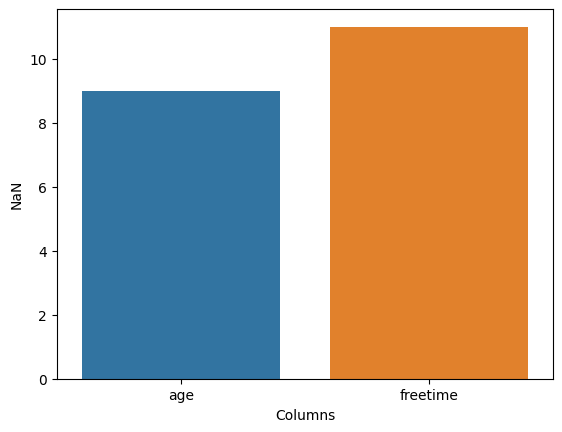

In [14]:
df.dropna(thresh=33, inplace=True)

data_utils.columns_with_nans(df)

<AxesSubplot: xlabel='age', ylabel='Count'>

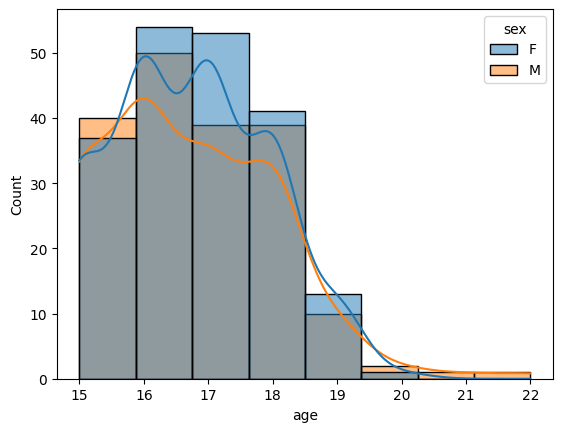

In [15]:
import seaborn as sns

sns.histplot(data=df, x="age", hue="sex", kde=True, bins = 8)


In [16]:
df["higher"].unique()

array(['yes', 'no'], dtype=object)

Text(0.5, 1.0, 'Higher == no')

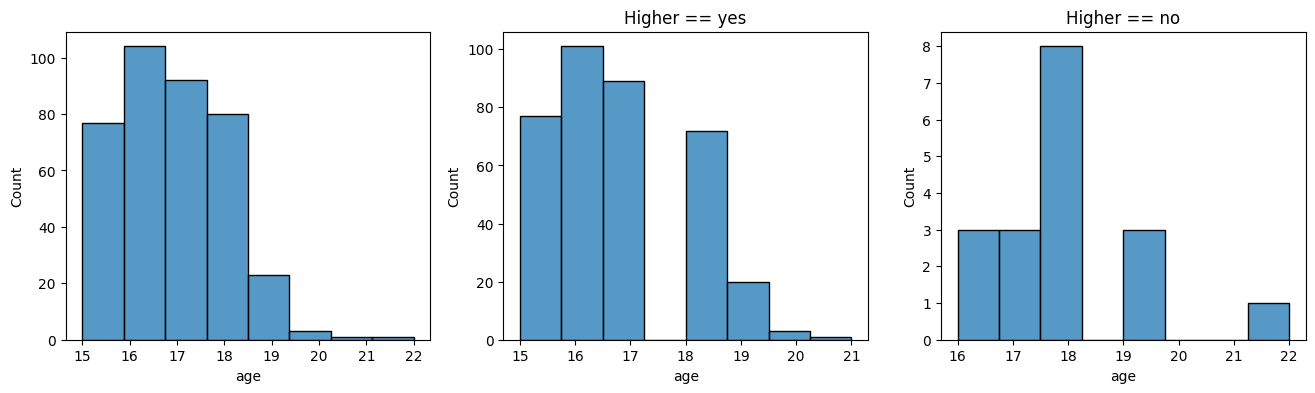

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(16,4))

sns.histplot(df, x="age", ax=ax[0], bins=8)
sns.histplot(df[df["higher"] == "yes"], x="age", ax=ax[1], bins=8)
ax[1].set_title("Higher == yes")
sns.histplot(df[df["higher"] == "no"], x="age", ax=ax[2], bins=8)
ax[2].set_title("Higher == no")


<AxesSubplot: xlabel='age', ylabel='Alcohol'>

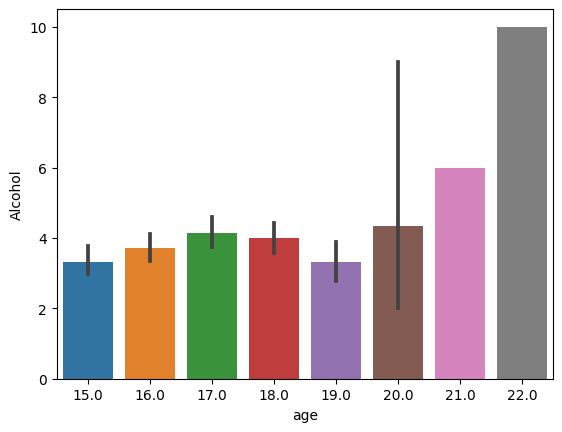

In [18]:
# Dalc - workday alcohol consumption (1 - very low to 5 - very high)
# Walc - weekend alcohol consumption

# check stuff
df["Walc"].isna().sum()
df["Walc"].unique(), df["Dalc"].unique()

df["Alcohol"] = df["Walc"] + df["Dalc"]
df["Alcohol"].value_counts()

sns.barplot(df, x="age", y="Alcohol")


(390, 35)
(28, 35)
(362, 35)


<AxesSubplot: xlabel='age', ylabel='Alcohol'>

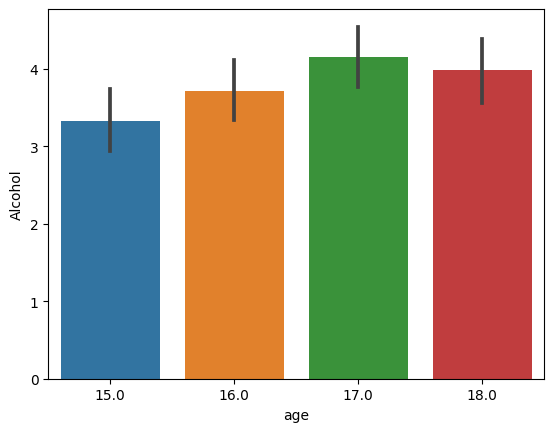

In [19]:
print(df.shape)
print(df[df["age"] > 18].shape)

# drop rows by just assigning df to a filtered version of itself
df = df[(df["age"] < 19) | df["age"].isna()]
print(df.shape)

sns.barplot(df, x="age", y="Alcohol")

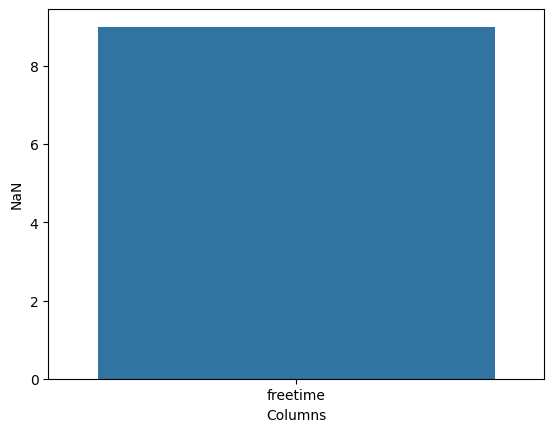

In [20]:
median_high_consumption = df.loc[df["Alcohol"] >= 4, "age"].median()

# not persistent
df.loc[df["Alcohol"] >= 4, "age"].fillna(median_high_consumption).isna().sum()
df.loc[df["Alcohol"] >= 4, "age"].isna().sum()

# make persistent
df.loc[df["Alcohol"] >= 4, "age"] = df.loc[df["Alcohol"] >= 4, "age"].fillna(median_high_consumption)
df.loc[df["Alcohol"] < 4, "age"] = df.loc[df["Alcohol"] < 4, "age"].fillna(15)

data_utils.columns_with_nans(df)

<AxesSubplot: xlabel='age', ylabel='Count'>

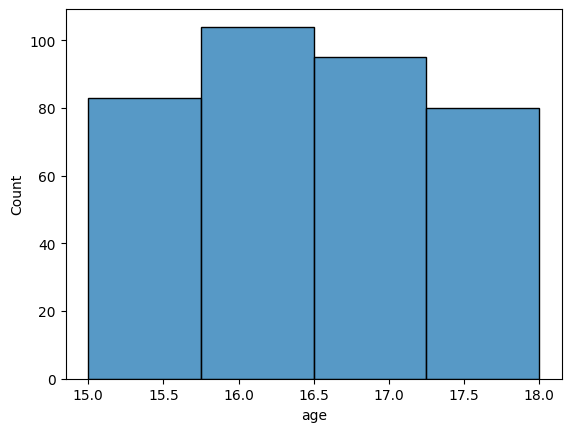

In [21]:
sns.histplot(df, x='age', bins=4)

# 3. Clean freetime column

In [29]:
df["freetime"].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
386    False
388    False
389    False
391    False
393    False
Name: freetime, Length: 362, dtype: bool